# lab 1 statistics


## **1. Simulating the Law of Large Numbers**
The Law of Large Numbers states that as the sample size increases, the sample mean approaches the population mean.
## **Observation:**
- As the sample size increases, the sample mean stabilizes around the true mean (4), confirming the Law of Large Numbers.



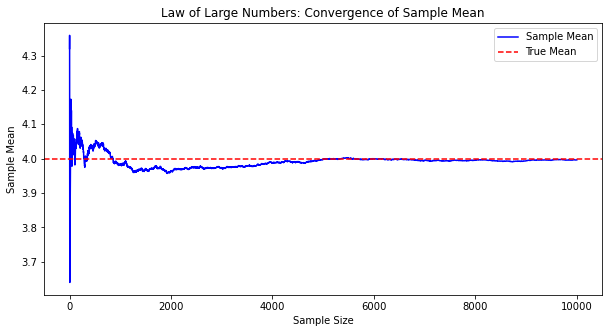

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


true_mean = 0  # Mean of the normal distribution
true_std = 1    # Standard deviation
max_sample_size = 10000  

# Generate random samples
samples = np.random.normal(true_mean, true_std, max_sample_size)

# Compute cumulative mean
sample_sizes = np.arange(1, max_sample_size + 1)
cumulative_means = np.cumsum(samples) / sample_sizes

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(sample_sizes, cumulative_means, color='blue', label="Sample Mean")
plt.axhline(y=true_mean, color='red', linestyle='dashed', label="True Mean")

plt.xlabel("Sample Size")
plt.ylabel("Sample Mean")
plt.title("Law of Large Numbers: Convergence of Sample Mean")
plt.legend()
plt.show()


## **2. Central Limit Theorem (CLT) in Action**
The CLT states that the distribution of sample means approaches a normal distribution, regardless of the population distribution.
## **Observation:**
For small `n` (e.g., 5, 10), the sample means still show some skewness.
 - For large `n` (e.g., 30, 50), the sample means closely follow a normal distribution.
 - This confirms the Central Limit Theorem (CLT): as `n` increases, the distribution of the sample mean becomes approximately normal.


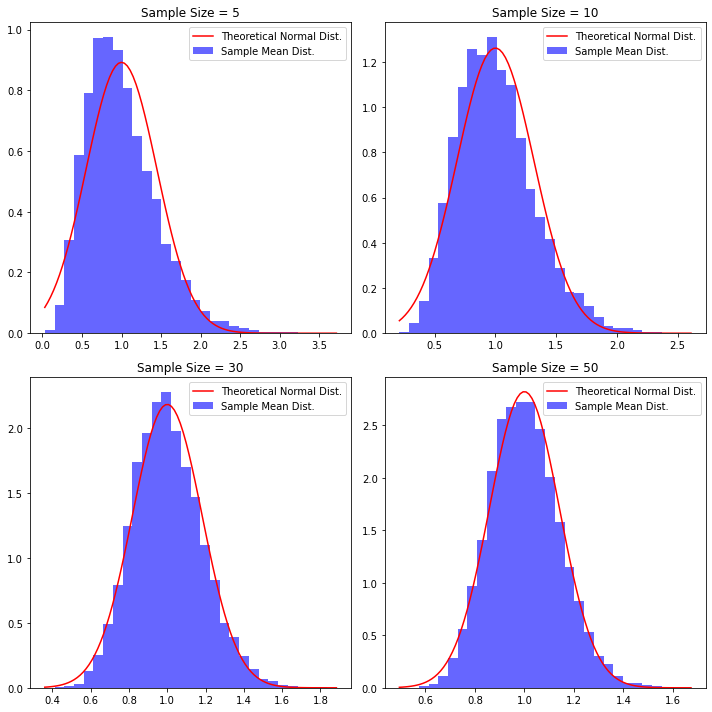

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


num_samples = 10000 
lambda_param = 1.0   # Exponential distribution parameter (rate)
sample_sizes = [5, 10, 30, 50]  # Different sample sizes

plt.figure(figsize=(10, 10))

for i, n in enumerate(sample_sizes, 1):
    sample_means = [np.mean(np.random.exponential(scale=1/lambda_param, size=n)) for _ in range(num_samples)]
    
    # Plot histogram
    plt.subplot(2, 2, i)
    plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='blue', label="Sample Mean Dist.")
    
    # Overlay normal distribution
    mean_theoretical = 1 / lambda_param  # Theoretical mean of exponential distribution
    std_theoretical = (1 / lambda_param) / np.sqrt(n)  # CLT: std of sample mean
    x = np.linspace(min(sample_means), max(sample_means), 100)
    plt.plot(x, stats.norm.pdf(x, mean_theoretical, std_theoretical), 'r-', label="Theoretical Normal Dist.")

    plt.title(f"Sample Size = {n}")
    plt.legend()

plt.tight_layout()
plt.show()


## **3. Simulating Variance of Small Samples**
Small samples tend to have higher variance compared to larger samples.
## **Observation:**
Biased variance estimator (dividing by `n`) underestimates the true variance.
Unbiased variance estimator (dividing by `n-1`) better approximates the true variance.
 As `n` increases, both estimators converge towards the true variance.


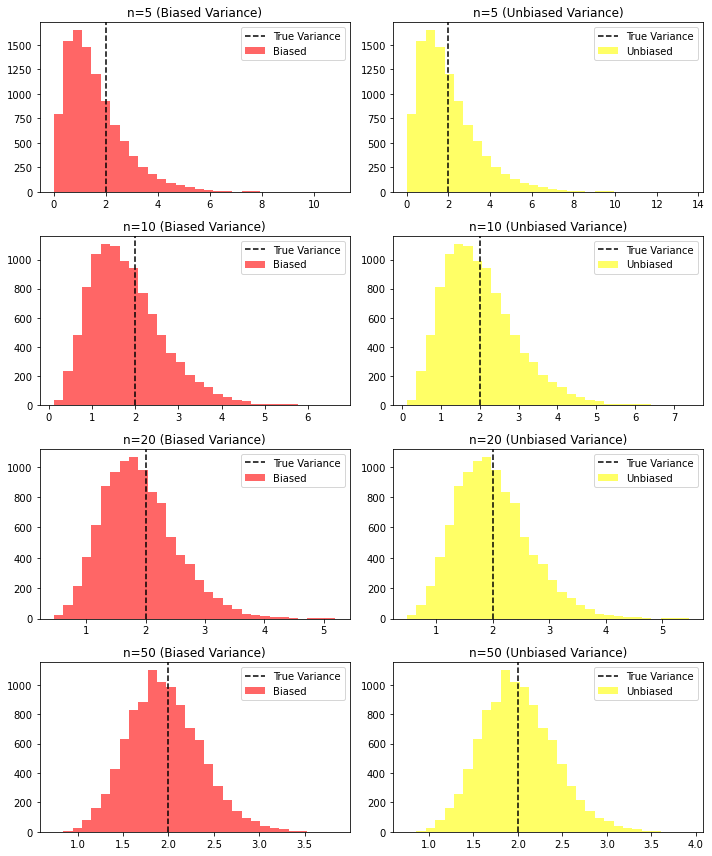

In [7]:
import numpy as np
import matplotlib.pyplot as plt


true_mean = 10  # Mean of the normal distribution
true_std = np.sqrt(2)      # Standard deviation of the normal distribution
true_variance = true_std ** 2  
sample_sizes = [5, 10, 20, 50]  
num_samples = 10000 

# Create figure
fig, axes = plt.subplots(len(sample_sizes), 2, figsize=(10, 12))

for i, n in enumerate(sample_sizes):
    biased_variances = []
    unbiased_variances = []

    for _ in range(num_samples):
        sample = np.random.normal(true_mean, true_std, n)
        biased_variances.append(np.var(sample, ddof=0))   # Biased (dividing by n)
        unbiased_variances.append(np.var(sample, ddof=1)) # Unbiased (dividing by n-1)

    # Plot Biased Variance
    axes[i, 0].hist(biased_variances, bins=30, color='red', alpha=0.6, label="Biased")
    axes[i, 0].axvline(true_variance, color='black', linestyle='dashed', label="True Variance")
    axes[i, 0].set_title(f"n={n} (Biased Variance)")
    axes[i, 0].legend()

    # Plot Unbiased Variance
    axes[i, 1].hist(unbiased_variances, bins=30, color='yellow', alpha=0.6, label="Unbiased")
    axes[i, 1].axvline(true_variance, color='black', linestyle='dashed', label="True Variance")
    axes[i, 1].set_title(f"n={n} (Unbiased Variance)")
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

